In [1]:
%matplotlib inline

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(123)

# Krueger (1999)

The author studies the "incumbency advantage", i.e. the overall causal impact of being the current incumbent party in a district on the votes obtained in the district's election.

* Lee, David S. (2008). Randomized experiments from non-random selection in U.S. House elections. Journal of Econometrics.

In [5]:
df_base = pd.read_stata('../../temp.dta')
df_base.sample(5)

schidkn     pscore  classid    cs  female  nwhite    n
5125      68  91.629356  20259.0  24.0     0.0     0.0  1.0
4632      71  59.357117  21200.0  24.0     0.0     0.0  1.0
1957      57  37.614540  16852.0  13.0     0.0     0.0  1.0
1295      66  27.792875  19565.0  14.0     0.0     0.0  1.0
1314      11  54.373123   3200.0  22.0     1.0     0.0  1.0

## How many different classes do we have?

In [61]:
df_base['classid'].nunique()

318

## How does the distribution of class size look like?

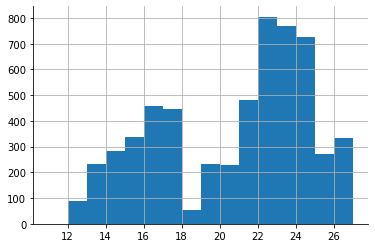

In [62]:
df_base['cs'].hist(bins=range(11, 28));

## What are the basic features of class size?

In [77]:
df_base.groupby('classid')['cs'].mean().describe()

count    318.000000
mean      19.424528
std        4.138642
min       12.000000
25%       16.000000
50%       20.000000
75%       23.000000
max       27.000000
Name: cs, dtype: float64

## How does the distribution of test scores look like?

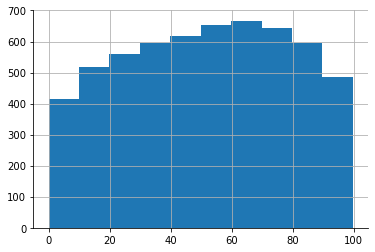

In [53]:
df_base['pscore'].hist()

## How do test scores vary overall?

In [31]:
df_base['pscore'].std()

27.059996

## How do test scores vary within class?

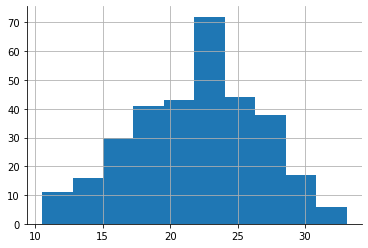

In [32]:
df_base.groupby('classid')['pscore'].std().hist()

## Is there a relationship between class size and scores?

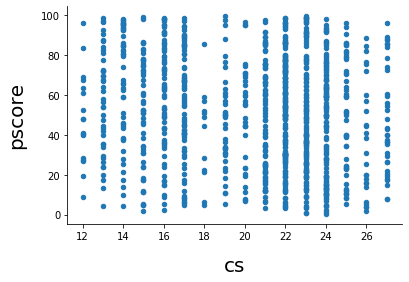

In [55]:
df_base.sample(1000).plot.scatter(x='cs', y='pscore')

In [56]:
formula = 'pscore ~ cs'
rslt = smf.ols(formula=formula, data=df_base).fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pscore   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     47.39
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           6.44e-12
Time:                        15:40:39   Log-Likelihood:                -27066.
No. Observations:                5743   AIC:                         5.414e+04
Df Residuals:                    5741   BIC:                         5.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.0666      1.855     34.536      0.000      60.430      67.703
cs            -0.6180      0.090     -6.884      0.000      -0.794      -0.442
==============================================================================
Omnibus:                     2351.698   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.870
Skew:                          -0.070   Prob(JB):                     9.33e-65
Kurtosis:                       1.899   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## What is the intraclass correlation factor?

We will use this an example to illustrate the interfacing between *R* and *Python*.

In [40]:
from rpy2.robjects import DataFrame, FloatVector, IntVector
from rpy2.robjects.packages import importr

r_icc = importr("ICC")
df = DataFrame({"groups": IntVector(df_base['classid']),
                "values": FloatVector(df_base['pscore'])})
rslt = r_icc.ICCbare("groups", "values", data=df)[0]
print('intraclass correlation factor {:5.3f}'.format(rslt))

intraclass correlation factor 0.317


In [18]:
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/2DeuEQx')
HTML(html.read().decode('utf-8'))